In [151]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist

import textwrap

import matplotlib.pyplot as plt

import numpy as np
import scipy

import pandas as pd


sw = stopwords.words("english")

ModuleNotFoundError: No module named 'researchpy'

In [3]:
small_tweets= ["sonoraninst_tweets.txt",
              "TheICCFGroup_tweets.txt",
              "CECSB_tweets.txt",
              "1000oregon_tweets.txt",
              "EarthShare_tweets.txt",
              "CRKeeper_tweets.txt",
              "ConservationNW_tweets.txt",
              "QLFNews_tweets.txt",
              "globalgreen_tweets.txt",
              "SustainableNW_tweets.txt" ]

medium_tweets = ["wildearthguard_tweets.txt",
                "WTA_hikers_tweets.txt",
                "ncascadeswa_tweets.txt",
                "PCTAssociation_tweets.txt",
                "PachamamaOrg_tweets.txt",
                "TreePeople_org_tweets.txt",
                "mohonkpreserve_tweets.txt",
                "PECPA_tweets.txt",
                "standearth_tweets.txt",
                 "earthisland_tweets.txt"
                ]

large_tweets = ["CeresNews_tweets.txt",
               "chesapeakebay_tweets.txt",
               "GrowNYC_tweets.txt",
               "RockyMtnInst_tweets.txt",
               "Earthjustice_tweets.txt",
               "rff_tweets.txt",
               "Waterkeeper_tweets.txt",
               "TPWFoundation_tweets.txt",
               "the_sca_tweets.txt",
               "ClimateReality_tweets.txt"]

small_MVVs = [
             "www_cecsb_org_about_our-mission.txt",
             "www_chattahoochee_org_about.txt",
             "www_conservationnw_org_about-us.txt",
             "Earthshare MVV.txt",
             "www_friends_org_about-usour-story.txt",
             "www_globalgreen_org.txt",
             "International Conservation MVV.txt",
             "www_qlf_org_about-qlf_mission-vision.txt",
             "www_sonoraninstitute_org_our-story_mission-vision.txt",
             "www_sustainablenorthwest_orgfocus.txt"]

medium_MVVs = ["www_earthisland_org_index_php_aboutUsabout-earth-island.txt",
                    "www_mohonkpreserve_org_what-we-do.txt",
                    "www_ncascades_org_discovernorth-cascades-institute.txt",
                    "www_pachamama_org_aboutmission.txt",
                    "Pacific Crest MVV.txt",
                    "www_pecpa_org_about.txt",
                    "www_stand_earth_aboutmission-and-principles.txt",
                    "www_treepeople_org_our-work.txt",
                    "www_wildearthguardians_org_about-us_mission-vision-history.txt",
                    "www_wta_org_our-workabout.txt"]

large_MVVs = ["www_cbf_org_about-cbf_our-mission.txt",
                    "www_ceres_orgabout-us.txt",
                    "www_climaterealityproject_orgour-mission.txt",
                    "www_earthjustice_orgabout.txt",
                    "www_grownyc_orgabout.txt",
                    "www_rff_org_about.txt",
                    "RMI MVV.txt",
                    "www_thesca_orgabout.txt",
                    "Texas Parks MVV.txt",
                    "www_waterkeeper_org_who-we-are.txt"]

In [4]:
##First I will read in the text files that contain all the values and their synonyms

values_files = ["achievement.txt",
                "benevolence.txt",
                "conformity.txt",
                "hedonism.txt",
                "power.txt",
                "security.txt",
                "self_direction.txt",
                "stimulation.txt",
                "tradition.txt",
                "universalism.txt"]

values_dict=dict()

for file in values_files: #For each text file
    with open(file, "r", encoding = "Latin-1") as infile: #Read in and tokenize the file
        key=file.replace("_synonyms.txt", "")
        words=infile.read()
        tokens=nltk.word_tokenize(words)
        
        values_dict[key] = set(t for t in tokens if t.isalpha()) #Add the list of synonyms into the dictionary using the overarching value as the key

In [5]:
def identify_values(file,v):  #Function will open a file, tokenize it, and store clean tokens in a list
    
    results=dict() #results will be stored in a dictionary
    
    open_file = open(file, "r", encoding = "Latin-1")
    
    read_file = open_file.read()
    
    tokenize_file = nltk.word_tokenize(read_file)
    
    clean_tokens = []
    
    for tokens in tokenize_file:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
            
    for value,words in v.items():  #for each key and synonym pair in the value dictionary
        
        matching_words = [w for w in clean_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
        values_freq=len(matching_words)/len(clean_tokens)  #Divide the amount of matching words by all words in text file
        
        results[value] = round(values_freq, 4) 
    
    
    return(results) ##Return the frequencies of each value, which are in a dictionary
            
    


In [6]:
def identify_synonyms(file, value):
    open_file = open(file, "r", encoding = "Latin-1")
    
    read_file = open_file.read()
    
    tokenize_file = nltk.word_tokenize(read_file)
    
    clean_tokens = []
    
    for tokens in tokenize_file:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
            
    for values in values_dict.keys():
    
        key=value
        
        matching_words = []
    
        for word in values_dict[value]:
            if word in clean_tokens:
                matching_words.append(word)
        
    return(matching_words)
        

## Values Frequencies in tweets

In [9]:
### Small Organizations ###

#Printing the values in the tweet files
for file in small_tweets:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

sonoraninst_tweets.txt

{'achievement.txt': 0.0089, 'benevolence.txt': 0.0196, 'conformity.txt': 0.0058, 'hedonism.txt': 0.0072, 'power.txt': 0.0094, 'security.txt': 0.0083, 'self_direction.txt': 0.0197, 'stimulation.txt': 0.0122, 'tradition.txt': 0.0049, 'universalism.txt': 0.0098}


TheICCFGroup_tweets.txt

{'achievement.txt': 0.0064, 'benevolence.txt': 0.0081, 'conformity.txt': 0.0112, 'hedonism.txt': 0.0021, 'power.txt': 0.0121, 'security.txt': 0.0122, 'self_direction.txt': 0.0129, 'stimulation.txt': 0.0046, 'tradition.txt': 0.0012, 'universalism.txt': 0.0123}


CECSB_tweets.txt

{'achievement.txt': 0.0082, 'benevolence.txt': 0.0164, 'conformity.txt': 0.0058, 'hedonism.txt': 0.0093, 'power.txt': 0.0091, 'security.txt': 0.01, 'self_direction.txt': 0.0173, 'stimulation.txt': 0.0176, 'tradition.txt': 0.0007, 'universalism.txt': 0.0189}


1000oregon_tweets.txt

{'achievement.txt': 0.0109, 'benevolence.txt': 0.0191, 'conformity.txt': 0.0108, 'hedonism.txt': 0.0047, 'power.txt': 0.0065, 

In [10]:
### Medium Organizations ###

#Printing the values in the tweet files
for file in medium_tweets:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

wildearthguard_tweets.txt

{'achievement.txt': 0.0077, 'benevolence.txt': 0.0133, 'conformity.txt': 0.0109, 'hedonism.txt': 0.002, 'power.txt': 0.0138, 'security.txt': 0.0247, 'self_direction.txt': 0.0158, 'stimulation.txt': 0.0137, 'tradition.txt': 0.0041, 'universalism.txt': 0.0123}


WTA_hikers_tweets.txt

{'achievement.txt': 0.0113, 'benevolence.txt': 0.0302, 'conformity.txt': 0.0052, 'hedonism.txt': 0.0128, 'power.txt': 0.005, 'security.txt': 0.0058, 'self_direction.txt': 0.0196, 'stimulation.txt': 0.0068, 'tradition.txt': 0.0021, 'universalism.txt': 0.0044}


ncascadeswa_tweets.txt

{'achievement.txt': 0.0093, 'benevolence.txt': 0.0132, 'conformity.txt': 0.0035, 'hedonism.txt': 0.0108, 'power.txt': 0.0052, 'security.txt': 0.0055, 'self_direction.txt': 0.0114, 'stimulation.txt': 0.0093, 'tradition.txt': 0.002, 'universalism.txt': 0.0076}


PCTAssociation_tweets.txt

{'achievement.txt': 0.0091, 'benevolence.txt': 0.0254, 'conformity.txt': 0.0067, 'hedonism.txt': 0.0081, 'power.txt'

In [11]:
### Large Tweets ###

#Printing the values in the tweet files
for file in large_tweets:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

CeresNews_tweets.txt

{'achievement.txt': 0.0198, 'benevolence.txt': 0.0092, 'conformity.txt': 0.0143, 'hedonism.txt': 0.0026, 'power.txt': 0.016, 'security.txt': 0.0155, 'self_direction.txt': 0.0241, 'stimulation.txt': 0.0287, 'tradition.txt': 0.0015, 'universalism.txt': 0.0354}


chesapeakebay_tweets.txt

{'achievement.txt': 0.0104, 'benevolence.txt': 0.0174, 'conformity.txt': 0.0066, 'hedonism.txt': 0.0047, 'power.txt': 0.0117, 'security.txt': 0.0154, 'self_direction.txt': 0.0167, 'stimulation.txt': 0.0126, 'tradition.txt': 0.0054, 'universalism.txt': 0.0142}


GrowNYC_tweets.txt

{'achievement.txt': 0.0063, 'benevolence.txt': 0.0224, 'conformity.txt': 0.0067, 'hedonism.txt': 0.0097, 'power.txt': 0.0048, 'security.txt': 0.016, 'self_direction.txt': 0.0187, 'stimulation.txt': 0.0127, 'tradition.txt': 0.0011, 'universalism.txt': 0.0082}


RockyMtnInst_tweets.txt

{'achievement.txt': 0.0177, 'benevolence.txt': 0.0086, 'conformity.txt': 0.0043, 'hedonism.txt': 0.001, 'power.txt': 0.0163

## Values Frequencies in MVVs

In [12]:
### Small Organizations ###

#Printing the values in mission/vision/values file
for file in small_MVVs:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

www_cecsb_org_about_our-mission.txt

{'achievement.txt': 0.0117, 'benevolence.txt': 0.0104, 'conformity.txt': 0.009, 'hedonism.txt': 0.0055, 'power.txt': 0.009, 'security.txt': 0.0104, 'self_direction.txt': 0.0255, 'stimulation.txt': 0.0304, 'tradition.txt': 0.0007, 'universalism.txt': 0.02}


www_chattahoochee_org_about.txt

{'achievement.txt': 0.0127, 'benevolence.txt': 0.019, 'conformity.txt': 0.0127, 'hedonism.txt': 0.0063, 'power.txt': 0.0063, 'security.txt': 0.019, 'self_direction.txt': 0.0222, 'stimulation.txt': 0.0127, 'tradition.txt': 0.0127, 'universalism.txt': 0.0159}


www_conservationnw_org_about-us.txt

{'achievement.txt': 0.0105, 'benevolence.txt': 0.0163, 'conformity.txt': 0.0096, 'hedonism.txt': 0.0019, 'power.txt': 0.0091, 'security.txt': 0.0196, 'self_direction.txt': 0.0148, 'stimulation.txt': 0.0077, 'tradition.txt': 0.0091, 'universalism.txt': 0.0129}


Earthshare MVV.txt

{'achievement.txt': 0.0136, 'benevolence.txt': 0.0136, 'conformity.txt': 0.0068, 'hedonism.tx

In [13]:
### Medium Organizations ###

#Printing the values in mission/vision/values file
for file in medium_MVVs:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

www_earthisland_org_index_php_aboutUsabout-earth-island.txt

{'achievement.txt': 0.0096, 'benevolence.txt': 0.0208, 'conformity.txt': 0.0192, 'hedonism.txt': 0.0016, 'power.txt': 0.0208, 'security.txt': 0.0112, 'self_direction.txt': 0.0352, 'stimulation.txt': 0.0384, 'tradition.txt': 0.0128, 'universalism.txt': 0.0208}


www_mohonkpreserve_org_what-we-do.txt

{'achievement.txt': 0.0061, 'benevolence.txt': 0.024, 'conformity.txt': 0.0074, 'hedonism.txt': 0.0061, 'power.txt': 0.008, 'security.txt': 0.0221, 'self_direction.txt': 0.0215, 'stimulation.txt': 0.0049, 'tradition.txt': 0.0086, 'universalism.txt': 0.0086}


www_ncascades_org_discovernorth-cascades-institute.txt

{'achievement.txt': 0.0108, 'benevolence.txt': 0.0431, 'conformity.txt': 0.0043, 'hedonism.txt': 0.0022, 'power.txt': 0.0086, 'security.txt': 0.0065, 'self_direction.txt': 0.028, 'stimulation.txt': 0.0129, 'tradition.txt': 0.0, 'universalism.txt': 0.0216}


www_pachamama_org_aboutmission.txt

{'achievement.txt': 0.011, '

In [14]:
### Large Organizations ###

#Printing the values in mission/vision/values file
for file in large_MVVs:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

www_cbf_org_about-cbf_our-mission.txt

{'achievement.txt': 0.0037, 'benevolence.txt': 0.0331, 'conformity.txt': 0.0074, 'hedonism.txt': 0.0, 'power.txt': 0.0074, 'security.txt': 0.0331, 'self_direction.txt': 0.0479, 'stimulation.txt': 0.011, 'tradition.txt': 0.0092, 'universalism.txt': 0.0221}


www_ceres_orgabout-us.txt

{'achievement.txt': 0.0337, 'benevolence.txt': 0.0132, 'conformity.txt': 0.0117, 'hedonism.txt': 0.0, 'power.txt': 0.0146, 'security.txt': 0.0102, 'self_direction.txt': 0.0381, 'stimulation.txt': 0.0395, 'tradition.txt': 0.0, 'universalism.txt': 0.0322}


www_climaterealityproject_orgour-mission.txt

{'achievement.txt': 0.0092, 'benevolence.txt': 0.0202, 'conformity.txt': 0.0037, 'hedonism.txt': 0.0, 'power.txt': 0.0221, 'security.txt': 0.0202, 'self_direction.txt': 0.0202, 'stimulation.txt': 0.0349, 'tradition.txt': 0.0037, 'universalism.txt': 0.1011}


www_earthjustice_orgabout.txt

{'achievement.txt': 0.0174, 'benevolence.txt': 0.0326, 'conformity.txt': 0.037, 'hed

## Cosine Similarity

In [15]:
def cosine_dist(a,b) :
    dist = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return(dist)

In [16]:
def values_similarity(file1,file2, v):
    
    org_name = file1.rstrip("tweets.txt")
    
    ###To calculate frequencies in tweets and store as vector###
    
    
    open_file1 = open(file1, "r", encoding = "Latin-1")
    
    read_file1 = open_file1.read()
    
    tokenize_file1 = nltk.word_tokenize(read_file1)
    
    clean_tokens = []
    
    for tokens in tokenize_file1:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
    
    a = [] #Store values freqs
    
    for value,words in v.items():  #for each key and synonym pair in the value dictionary
        
        matching_words = [w for w in clean_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
        values_freq=len(matching_words)/len(clean_tokens)  #Divide the amount of matching words by all words in text file
        
        file1_values_freq = round(values_freq, 4)
        
        a.append(file1_values_freq)
        
    
    
        
    ###To calculate frequences in MVVs as vector###
    
    
    open_file2 = open(file2, "r", encoding = "Latin-1")
    
    read_file2 = open_file2.read()
    
    tokenize_file2 = nltk.word_tokenize(read_file2)
    
    clean_tokens = []
    
    for tokens in tokenize_file2:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
    b= []
    
    for value,words in v.items():  #for each key and synonym pair in the value dictionary
        
        matching_words = [w for w in clean_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
        values_freq=len(matching_words)/len(clean_tokens)  #Divide the amount of matching words by all words in text file
        
        file2_values_freq = round(values_freq, 4) 
        
        b.append(file2_values_freq)
    
    
    
    return("The cosine distance between tweets and MVVs for" + " " + org_name + " " + "is" + " " + str(cosine_dist(a,b))) ##Return the frequencies of each value, which are in a dictionary

## Small Orgs

In [20]:
small_values_distances = [] 

for tweets, MVV in zip(small_tweets, small_MVVs):
    small_values_distances.append(values_similarity(tweets, MVV, values_dict))

In [21]:
small_values_distances

['The cosine distance between tweets and MVVs for sonoraninst_ is 0.8866211910908003',
 'The cosine distance between tweets and MVVs for TheICCFGroup_ is 0.9072105499242719',
 'The cosine distance between tweets and MVVs for CECSB_ is 0.878034961935552',
 'The cosine distance between tweets and MVVs for 1000oregon_ is 0.7213674523660601',
 'The cosine distance between tweets and MVVs for EarthShare_ is 0.6599885803060995',
 'The cosine distance between tweets and MVVs for CRKeeper_ is 0.6258253708012392',
 'The cosine distance between tweets and MVVs for ConservationNW_ is 0.7609578274173477',
 'The cosine distance between tweets and MVVs for QLFNews_ is 0.9325509057153367',
 'The cosine distance between tweets and MVVs for globalgreen_ is 0.903826789532095',
 'The cosine distance between tweets and MVVs for SustainableNW_ is 0.863206762006737']

In [22]:
#Creating a histogram to show distribution of distances between tweets and MVVs
#Removing rest of string and just grabbing values of distances

just_distances=[]
for item in small_values_distances:
    distance=item.split('is ')[1]
    
    just_distances.append(distance)
    
small_rounded_distances=[]
for item in just_distances:
    rounded=round(float(item),2)
    small_rounded_distances.append(rounded)


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([0.63 , 0.633, 0.636, 0.639, 0.642, 0.645, 0.648, 0.651, 0.654,
        0.657, 0.66 , 0.663, 0.666, 0.669, 0.672, 0.675, 0.678, 0.681,
        0.684, 0.687, 0.69 , 0.693, 0.696, 0.699, 0.702, 0.705, 0.708,
        0.711, 0.714, 0.717, 0.72 , 0.723, 0.726, 0.729, 0.732, 0.735,
        0.738, 0.741, 0.744, 0.747, 0.75 , 0.753, 0.756, 0.759, 0.762,
        0.765, 0.768, 0.771, 0.774, 0.777, 0.78 , 0.783, 0.786, 0.789,
        0.792, 0.795, 0.798, 0.801, 0.804, 0.807, 0.81 , 0.813, 0.816,
        0.819, 0.822, 0.825, 0.828, 0.831, 0.834, 0.8

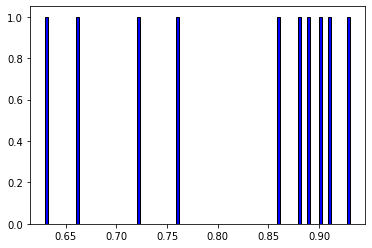

In [23]:
# matplotlib histogram of rounded distances
plt.hist(small_rounded_distances, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 100)

In [24]:
#Basic stats of distances
print(np.mean(small_rounded_distances))
print(np.std(small_rounded_distances))

0.8140000000000001
0.10565983153497835


In [25]:
y = np.array(small_rounded_distances)
skewness = scipy.stats.skew(y, bias=False)
print (skewness)

-0.7001325098447607


## Medium Orgs

In [26]:
medium_values_distances = [] 

for tweets, MVV in zip(medium_tweets, medium_MVVs):
    medium_values_distances.append(values_similarity(tweets, MVV, values_dict))

In [27]:
medium_values_distances

['The cosine distance between tweets and MVVs for wildearthguard_ is 0.8681047904776686',
 'The cosine distance between tweets and MVVs for WTA_hikers_ is 0.8750106032344972',
 'The cosine distance between tweets and MVVs for ncascadeswa_ is 0.8699430733858964',
 'The cosine distance between tweets and MVVs for PCTAssociation_ is 0.7686067302152884',
 'The cosine distance between tweets and MVVs for PachamamaOrg_ is 0.8151516300656501',
 'The cosine distance between tweets and MVVs for TreePeople_org_ is 0.7898847128448261',
 'The cosine distance between tweets and MVVs for mohonkpreserve_ is 0.7479644343842562',
 'The cosine distance between tweets and MVVs for PECPA_ is 0.8448051594737386',
 'The cosine distance between tweets and MVVs for standearth_ is 0.861829748659632',
 'The cosine distance between tweets and MVVs for earthisland_ is 0.7797874737782536']

In [28]:
#Creating a histogram to show distribution of distances between tweets and MVVs
#Removing rest of string and just grabbing values of distances

just_distances=[]
for item in medium_values_distances:
    distance=item.split('is ')[1]
    
    just_distances.append(distance)
    
medium_rounded_distances=[]
for item in just_distances:
    rounded=round(float(item),2)
    medium_rounded_distances.append(rounded)


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.75  , 0.7513, 0.7526, 0.7539, 0.7552, 0.7565, 0.7578, 0.7591,
        0.7604, 0.7617, 0.763 , 0.7643, 0.7656, 0.7669, 0.7682, 0.7695,
        0.7708, 0.7721, 0.7734, 0.7747, 0.776 , 0.7773, 0.7786, 0.7799,
        0.7812, 0.7825, 0.7838, 0.7851, 0.7864, 0.7877, 0.789 , 0.7903,
        0.7916, 0.7929, 0.7942, 0.7955, 0.7968, 0.7981, 0.7994, 0.8007,
        0.802 , 0.8033, 0.8046, 0.8059, 0.8072, 0.8085, 0.8098, 0.8111,
        0.8124, 0.8137, 0.815 , 0.8163, 0.8176, 0.8189, 0.8202, 0.8215,
        0.8228, 0.8241, 0.8254, 0.8267, 0.828 

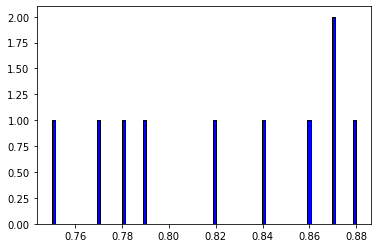

In [32]:
# matplotlib histogram of rounded distances
plt.hist(medium_rounded_distances, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 100)

In [29]:
#Basic stats of distances
print(np.mean(medium_rounded_distances))
print(np.std(medium_rounded_distances))

0.8230000000000001
0.045177427992306056


In [30]:
y = np.array(medium_rounded_distances)
skewness = scipy.stats.skew(y, bias=False)
print (skewness)

-0.2635942139804621


## Large Organizations

In [33]:
large_values_distances = [] 

for tweets, MVV in zip(large_tweets, large_MVVs):
    large_values_distances.append(values_similarity(tweets, MVV, values_dict))

In [34]:
large_values_distances

['The cosine distance between tweets and MVVs for CeresNews_ is 0.7489072810686933',
 'The cosine distance between tweets and MVVs for chesapeakebay_ is 0.8670614266685107',
 'The cosine distance between tweets and MVVs for GrowNYC_ is 0.5795961566835953',
 'The cosine distance between tweets and MVVs for RockyMtnInst_ is 0.8359937704624576',
 'The cosine distance between tweets and MVVs for Earthjustice_ is 0.6159488393719895',
 'The cosine distance between tweets and MVVs for rff_ is 0.958821050012224',
 'The cosine distance between tweets and MVVs for Waterkeeper_ is 0.896896804431227',
 'The cosine distance between tweets and MVVs for TPWFoundation_ is 0.8555092259666036',
 'The cosine distance between tweets and MVVs for the_sca_ is 0.6056646235341085',
 'The cosine distance between tweets and MVVs for ClimateReality_ is 0.876801463060584']

In [35]:
#Creating a histogram to show distribution of distances between tweets and MVVs
#Removing rest of string and just grabbing values of distances

just_distances=[]
for item in large_values_distances:
    distance=item.split('is ')[1]
    
    just_distances.append(distance)
    
large_rounded_distances=[]
for item in just_distances:
    rounded=round(float(item),2)
    large_rounded_distances.append(rounded)


(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.58  , 0.5838, 0.5876, 0.5914, 0.5952, 0.599 , 0.6028, 0.6066,
        0.6104, 0.6142, 0.618 , 0.6218, 0.6256, 0.6294, 0.6332, 0.637 ,
        0.6408, 0.6446, 0.6484, 0.6522, 0.656 , 0.6598, 0.6636, 0.6674,
        0.6712, 0.675 , 0.6788, 0.6826, 0.6864, 0.6902, 0.694 , 0.6978,
        0.7016, 0.7054, 0.7092, 0.713 , 0.7168, 0.7206, 0.7244, 0.7282,
        0.732 , 0.7358, 0.7396, 0.7434, 0.7472, 0.751 , 0.7548, 0.7586,
        0.7624, 0.7662, 0.77  , 0.7738, 0.7776, 0.7814, 0.7852, 0.789 ,
        0.7928, 0.7966, 0.8004, 0.8042, 0.808 

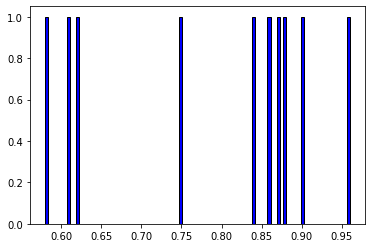

In [36]:
# matplotlib histogram of rounded distances
plt.hist(large_rounded_distances, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 100)

In [37]:
#Basic stats of distances
print(np.mean(large_rounded_distances))
print(np.std(large_rounded_distances))

0.787
0.13031116606031887


In [38]:
y = np.array(large_rounded_distances)
skewness = scipy.stats.skew(y, bias=False)
print (skewness)

-0.5674379198282534


## All organizations

In [39]:
combined_tweets = small_tweets + medium_tweets + large_tweets
combined_MVVs = small_MVVs + medium_MVVs + large_MVVs

In [40]:
combined_values_distances = [] 

for tweets, MVV in zip(combined_tweets, combined_MVVs):
    combined_values_distances.append(values_similarity(tweets, MVV, values_dict))

In [41]:
#Creating a histogram to show distribution of distances between tweets and MVVs
#Removing rest of string and just grabbing values of distances

just_distances=[]
for item in combined_values_distances:
    distance=item.split('is ')[1]
    
    just_distances.append(distance)
    
combined_rounded_distances=[]
for item in just_distances:
    rounded=round(float(item),2)
    combined_rounded_distances.append(rounded)


(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        2., 0., 0., 0., 0., 3., 0., 0., 3., 0., 3., 0., 0., 1., 0., 0., 2.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.58  , 0.5838, 0.5876, 0.5914, 0.5952, 0.599 , 0.6028, 0.6066,
        0.6104, 0.6142, 0.618 , 0.6218, 0.6256, 0.6294, 0.6332, 0.637 ,
        0.6408, 0.6446, 0.6484, 0.6522, 0.656 , 0.6598, 0.6636, 0.6674,
        0.6712, 0.675 , 0.6788, 0.6826, 0.6864, 0.6902, 0.694 , 0.6978,
        0.7016, 0.7054, 0.7092, 0.713 , 0.7168, 0.7206, 0.7244, 0.7282,
        0.732 , 0.7358, 0.7396, 0.7434, 0.7472, 0.751 , 0.7548, 0.7586,
        0.7624, 0.7662, 0.77  , 0.7738, 0.7776, 0.7814, 0.7852, 0.789 ,
        0.7928, 0.7966, 0.8004, 0.8042, 0.808 

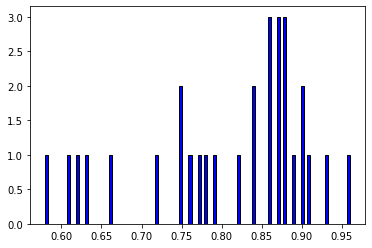

In [42]:
# matplotlib histogram of rounded distances
plt.hist(combined_rounded_distances, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 100)

In [43]:
#Basic stats of distances
print(np.mean(combined_rounded_distances))
print(np.std(combined_rounded_distances))

0.808
0.10146920715172657


In [44]:
y = np.array(combined_rounded_distances)
skewness = scipy.stats.skew(y, bias=False)
print (skewness)

-0.8599122461331324


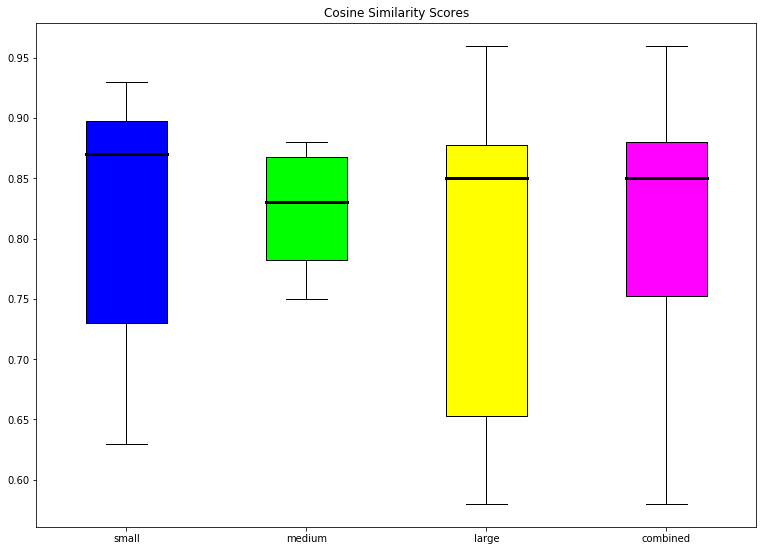

In [150]:
##Making a boxplot of all 

box_data = [small_rounded_distances, medium_rounded_distances, large_rounded_distances, combined_rounded_distances]

fig = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot(box_data, patch_artist = True)

ax.set_xticklabels(['small', 'medium', 
                    'large', 'combined'])
colors = ['#0000FF', '#00FF00', 
          '#FFFF00', '#FF00FF']

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)
  
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
# Adding title 
plt.title("Cosine Similarity Scores")

# show plot
plt.show()


  


In [153]:
##Using a one way ANOVA to determine whether or not difference in means is significant

import scipy.stats as stats

stats.f_oneway(small_rounded_distances, medium_rounded_distances, large_rounded_distances)

F_onewayResult(statistic=0.31395348837209336, pvalue=0.7331840655252015)

## Identifying Outliers with IQR


In [45]:
import seaborn as sns

In [46]:
##Sort Data
sort = np.sort(combined_rounded_distances)

In [48]:
##Calculating quartiles

Q1 = np.percentile(sort, 25, interpolation = 'midpoint')
Q2 = np.percentile(sort, 50, interpolation = 'midpoint')
Q3 = np.percentile(sort, 75, interpolation = 'midpoint')

In [52]:
##Calculate IQR

IQR = Q3 - Q1
print(IQR)

0.125


In [53]:
##Lower limit and upper limit

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print("The lower limit for outliers is" + " " + str(low_lim))
print("The upper limit for outliers is" + " " + str(up_lim))

The lower limit for outliers is 0.5675
The upper limit for outliers is 1.0675


In [156]:
##Limit for the lowest 25%
print(Q1)
##limit for upper 25%
print(Q3)

0.755
0.88


Using these limits, there are no outliers. However, the lowest 25% of data would be anything .755 and under. The highest 25% would be .88 and above. This can be used to discuss the lowest similarities

## Looking at specific values-laden language

## Most Common Synonyms in Tweets

In [58]:
## Combining tokens to look at most common values overall and what values orgs are using

###Tweets

nonprofit_tweet_files = small_tweets + medium_tweets + large_tweets

combined_tweet_tokens = []

for file in nonprofit_tweet_files:
    nonprofit = open(file, "r", encoding="Latin-1")
    nonprofit_tweets = nonprofit.read()
    tweet_tokens = nltk.word_tokenize(nonprofit_tweets)
    
    
    
    for tokens in tweet_tokens:
        if tokens not in sw and tokens.isalpha() and tokens != 'https' and tokens != 'amp': #Removing irrelevant tokens that appear
            combined_tweet_tokens.append(tokens.lower())

In [81]:
##Looking at synonyms that are appearing in combined tweet tokens

for value,words in values_dict.items():  #for each key and synonym pair in the value dictionary
        
    matching_words = [w for w in combined_tweet_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
                
            
    print("There are" + " " + str(len(matching_words)) + " " + "matching words" + " " + "for" + " " + value)
        
       

There are 2920 matching words for achievement.txt
There are 4883 matching words for benevolence.txt
There are 2383 matching words for conformity.txt
There are 1851 matching words for hedonism.txt
There are 3001 matching words for power.txt
There are 4479 matching words for security.txt
There are 5693 matching words for self_direction.txt
There are 4011 matching words for stimulation.txt
There are 878 matching words for tradition.txt
There are 4958 matching words for universalism.txt


In [84]:
for value,words in values_dict.items():  #for each key and synonym pair in the value dictionary
        
    matching_words = [w for w in combined_tweet_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
    unique= Counter(matching_words)
            
    print(value + "\n" + str(unique.most_common(20)))
     

achievement.txt
[('win', 211), ('best', 199), ('growth', 139), ('well', 132), ('development', 126), ('goal', 97), ('progress', 91), ('perfect', 91), ('improve', 90), ('success', 81), ('benefit', 77), ('congratulations', 74), ('goals', 59), ('advance', 58), ('congrats', 55), ('achieve', 55), ('raise', 52), ('ambitious', 50), ('rise', 47), ('develop', 46)]
benevolence.txt
[('help', 852), ('thank', 426), ('thanks', 411), ('love', 339), ('friends', 256), ('share', 220), ('give', 164), ('service', 149), ('gift', 134), ('provide', 132), ('volunteer', 127), ('helping', 122), ('giving', 118), ('sharing', 106), ('care', 106), ('helped', 84), ('helps', 68), ('donate', 68), ('donation', 64), ('provides', 62)]
conformity.txt
[('support', 736), ('group', 122), ('supporting', 119), ('groups', 118), ('honor', 118), ('law', 105), ('order', 85), ('honored', 80), ('agree', 72), ('agreement', 72), ('follow', 60), ('rule', 54), ('following', 52), ('supports', 51), ('legal', 50), ('rules', 47), ('illegal',

## Most Common Synonyms in MVVs

In [85]:
## Combining tokens to look at most common values overall and what values orgs are using

nonprofit_MVV_files = small_MVVs + medium_MVVs + large_MVVs

combined_MVV_tokens = []

for file in nonprofit_MVV_files:
    nonprofit = open(file, "r", encoding="Latin-1")
    nonprofit_tweets = nonprofit.read()
    MVV_tokens = nltk.word_tokenize(nonprofit_tweets)
    
    
    
    for tokens in MVV_tokens:
        if tokens not in sw and tokens.isalpha() and tokens != 'https' and tokens != 'amp': #Removing irrelevant tokens that appear
            combined_MVV_tokens.append(tokens.lower())

    

In [86]:
for value,words in values_dict.items():  #for each key and synonym pair in the value dictionary
        
    matching_words = [w for w in combined_MVV_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
    unique= Counter(matching_words)
            
    print(value + "\n" + str(unique.most_common(20)))

achievement.txt
[('best', 13), ('achieve', 11), ('success', 10), ('improve', 10), ('goal', 8), ('successful', 8), ('benefit', 8), ('development', 8), ('goals', 6), ('progress', 6), ('victories', 6), ('growth', 6), ('complete', 5), ('advance', 5), ('champion', 5), ('achieving', 5), ('raise', 4), ('well', 4), ('influence', 4), ('accomplish', 4)]
benevolence.txt
[('donate', 71), ('give', 43), ('volunteer', 36), ('help', 27), ('giving', 23), ('service', 22), ('share', 19), ('provide', 14), ('providing', 13), ('donation', 12), ('gift', 10), ('friends', 9), ('assistance', 9), ('provided', 6), ('charity', 6), ('love', 6), ('gifts', 4), ('philanthropy', 4), ('helping', 4), ('humanity', 4)]
conformity.txt
[('support', 50), ('legal', 23), ('group', 19), ('law', 11), ('order', 11), ('follow', 11), ('groups', 10), ('laws', 7), ('supporting', 6), ('following', 5), ('supported', 5), ('submit', 4), ('honor', 4), ('agreement', 3), ('supports', 3), ('agreeing', 3), ('ruling', 3), ('regulations', 2), ('

## Principal Components Analysis

In [102]:
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

## Tweets

In [94]:
##Tweet freqs



tweet_freq=[[0.0089, 0.0196, 0.0058, 0.0072, 0.0094, 0.0083, 0.0197, 0.0122, 0.0049, 0.0098],
 [0.0064, 0.0081, 0.0112, 0.0021, 0.0121, 0.0122, 0.0129, 0.0046, 0.0012, 0.0123],
 [0.0082, 0.0164, 0.0058, 0.0093, 0.0091, 0.01, 0.0173, 0.0176, 0.0007, 0.0189],
 [0.0109, 0.0191, 0.0108, 0.0047, 0.0065, 0.0101, 0.0261, 0.0093, 0.0018, 0.0147],
 [0.0081, 0.0182, 0.0062, 0.0077, 0.0094, 0.0222, 0.0214, 0.0168, 0.0023, 0.0218],
 [0.0072, 0.0234, 0.0066,  0.0085, 0.0073, 0.0165, 0.0213, 0.0059, 0.0015, 0.0088],
 [0.0086, 0.012, 0.0165, 0.0045, 0.0101, 0.017, 0.017, 0.0101, 0.0031, 0.0086],
 [0.0058, 0.0158, 0.0058, 0.0052, 0.0045, 0.0064, 0.0084, 0.0093, 0.0061, 0.0126],
 [0.0085, 0.0123, 0.0068, 0.0043, 0.0068, 0.0224, 0.0165, 0.0151, 0.0015, 0.0276],
 [0.0109, 0.0191, 0.0126, 0.0059, 0.0069, 0.0048, 0.0148, 0.0123, 0.0023, 0.0078],
 
 [0.0077, 0.0133, 0.0109, 0.002, 0.0138, 0.0247, 0.0158, 0.0137, 0.0041, 0.0123],
 [0.0113, 0.0302, 0.0052, 0.0128, 0.005, 0.0058, 0.0196, 0.0068, 0.0021, 0.0044],
 [0.0093, 0.0132, 0.0035, 0.0108, 0.0052, 0.0055, 0.0114, 0.0093, 0.002, 0.0076],
 [0.0091, 0.0254, 0.0067, 0.0081, 0.0059, 0.0092, 0.014, 0.0051, 0.0021, 0.0045],
 [0.0067, 0.0139, 0.0081, 0.0061, 0.0123, 0.0134, 0.0176, 0.0129, 0.0066, 0.0176],
 [0.0051, 0.0259, 0.0053, 0.0081, 0.0043, 0.0149, 0.0233, 0.016, 0.002, 0.02],
 [0.0071, 0.0151, 0.0027, 0.0093, 0.0044, 0.0046, 0.0138, 0.0096, 0.0186, 0.0062],
 [0.0116, 0.0147, 0.0078, 0.0067, 0.0077, 0.009, 0.0206, 0.0125, 0.0013, 0.0168],
 [0.0122, 0.0068, 0.0063, 0.0016, 0.0099, 0.0166, 0.0196, 0.0132, 0.0013, 0.0212],
 [0.0099, 0.0086, 0.0075, 0.0032, 0.012, 0.0156, 0.017, 0.0098, 0.0015, 0.0232],
 
 [0.0198, 0.0092, 0.0143, 0.0026, 0.016, 0.0155, 0.0241, 0.0287, 0.0015, 0.0354],
 [0.0104, 0.0174, 0.0066, 0.0047, 0.0117, 0.0154, 0.0167, 0.0126, 0.0054, 0.0142],
 [0.0063, 0.0224, 0.0067, 0.0097, 0.0048, 0.016, 0.0187, 0.0127, 0.0011, 0.0082],
 [0.0177, 0.0086, 0.0043, 0.001, 0.0163, 0.0115, 0.0235, 0.0297, 0.0004, 0.0198],
 [0.0081, 0.0076, 0.0115, 0.0024, 0.023, 0.0375, 0.0155, 0.015, 0.002, 0.0285],
 [0.0102, 0.0089, 0.0069, 0.0016, 0.0142, 0.0054, 0.0312, 0.0169, 0.001, 0.0186],
 [0.0062, 0.0137, 0.0096, 0.0041, 0.0118, 0.0264, 0.0199, 0.0118, 0.0016, 0.0181],
 [0.0118, 0.026, 0.0092, 0.0161, 0.0065, 0.0058, 0.012, 0.0052, 0.0048, 0.0008],
 [0.0102, 0.0247, 0.0058, 0.0082, 0.0081, 0.0087, 0.0186, 0.01, 0.0026, 0.0065],
 [0.0094, 0.0076, 0.0045, 0.0019, 0.0157, 0.0443, 0.0239, 0.0289, 0.0021, 0.0677]]



In [142]:
x=np.array(tweet_freq)
x=scale(x);x

array([[-0.17697429,  0.57223772, -0.60754108,  0.32981008, -0.06628178,
        -0.67331517,  0.27444966, -0.14471134,  0.58018537, -0.54146796],
       [-0.97655694, -1.2095494 ,  1.10413987, -1.08763212,  0.55082441,
        -0.25136619, -1.1685331 , -1.34015285, -0.53982465, -0.33892384],
       [-0.40085743,  0.07643609, -0.60754108,  0.91346275, -0.13484913,
        -0.48938869, -0.23483837,  0.70468131, -0.69117736,  0.19579265],
       [ 0.46269183,  0.49476871,  0.97734869, -0.36501453, -0.72909953,
        -0.47856948,  1.63255108, -0.60086665, -0.3582014 , -0.14448148],
       [-0.43284074,  0.3553245 , -0.4807499 ,  0.468775  , -0.06628178,
         0.83055427,  0.63519535,  0.57884536, -0.2068487 ,  0.43074384],
       [-0.72069049,  1.16100216, -0.35395872,  0.69111887, -0.54625325,
         0.21385961,  0.61397502, -1.13566943, -0.44901303, -0.62248561],
       [-0.27292421, -0.60529116,  2.78412303, -0.42060049,  0.09370872,
         0.26795563, -0.29849937, -0.4750307 

In [143]:
covar_matrix = PCA(n_components = 10) ##for 10 values


In [144]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([44.4, 59.1, 71.9, 82. , 87.7, 92.9, 96. , 97.7, 99.2, 99.9])

In the above array we see that the first feature explains roughly 44.4% of the variance within our data set while the first two explain 59.1 and so on. If we employ 10 features we capture 98.4% of the variance within the dataset, thus we gain very little by implementing an additional feature 

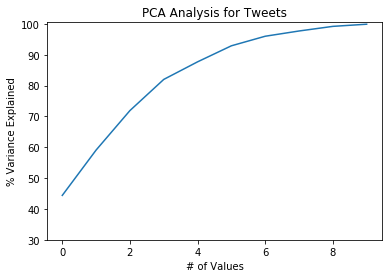

In [145]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Values')
plt.title('PCA Analysis for Tweets')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [134]:
import plotly.express as px

# features = ["achievement", "benevolence", "conformity", "hedonism", "power", "security", "self-direction", "stimulation", "tradition", "universalism"]

# fig = px.scatter_matrix(
#     tweet_freq,
#     dimensions=features,
#     color="org"
# )
# fig.update_traces(diagonal_visible=False)
# fig.show()


X = tweet_freq

pca = PCA(n_components=10)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, title = 'PCA Analysis for Tweets')

fig.show()

## MVV

In [121]:
MVV_freq= [[0.0117, 0.0104, 0.009, 0.0055, 0.009, 0.0104, 0.0255, 0.0304, 0.0007, 0.02],
           [0.0127, 0.019, 0.0127, 0.0063, 0.0063, 0.019, 0.0222, 0.0127, 0.0127, 0.0159],
           [0.0105, 0.0163, 0.0096, 0.0019, 0.0091, 0.0196, 0.0148, 0.0077, 0.0091, 0.0129],
           [0.0136, 0.0136, 0.0068, 0.0068, 0.0068, 0.0408, 0.0136, 0.034, 0.0136, 0.0544],
           [0.0118, 0.0324, 0.0088, 0.0, 0.0206, 0.0088, 0.0118, 0.0, 0.0, 0.0],
           [0.0078, 0.0294, 0.0039, 0.0, 0.0059, 0.0078, 0.0176, 0.0196, 0.0059, 0.0706],
           [0.0215, 0.0108, 0.043, 0.0, 0.0538, 0.0, 0.0323, 0.0054, 0.0, 0.0376],
           [0.014, 0.0321, 0.008, 0.0, 0.018, 0.002, 0.012, 0.014, 0.012, 0.0321],
           [0.0127, 0.019, 0.0127, 0.0063, 0.0063, 0.019, 0.0222, 0.0127, 0.0127, 0.0159],
           [0.0194, 0.0167, 0.0111, 0.0028, 0.0083, 0.025, 0.0139, 0.0194, 0.0056, 0.0194],
           
           [0.0096, 0.0208, 0.0192, 0.0016, 0.0208, 0.0112, 0.0352, 0.0384, 0.0128, 0.0208],
           [0.0061, 0.024, 0.0074, 0.0061, 0.008, 0.0221, 0.0215, 0.0049, 0.0086, 0.0086],
           [0.0108, 0.0431, 0.0043, 0.0022, 0.0086, 0.0065, 0.028, 0.0129, 0.0, 0.0216],
           [0.011, 0.0198, 0.0022, 0.0044, 0.0088, 0.0, 0.022, 0.0286, 0.0066, 0.0132],
           [0.0324, 0.037, 0.0139, 0.0, 0.0278, 0.0093, 0.0139, 0.0278, 0.0139, 0.0093],
           [0.0184, 0.0046, 0.0092, 0.0069, 0.0138, 0.0069, 0.0345, 0.0161, 0.0069, 0.0483],
           [0.0157, 0.0192, 0.0227, 0.0, 0.0087, 0.0192, 0.0175, 0.0157, 0.0105, 0.0279],
           [0.0, 0.024, 0.036, 0.004, 0.008, 0.02, 0.024, 0.016, 0.004, 0.02],
           [0.0087, 0.0192, 0.0192, 0.001, 0.0106, 0.0337, 0.0096, 0.0183, 0.0067, 0.0192],
           [0.0108, 0.0431, 0.0043, 0.0022, 0.0086, 0.0065, 0.028, 0.0129, 0.0, 0.0216],
           
           [0.0037, 0.0331, 0.0074, 0.0, 0.0074, 0.0331, 0.0479, 0.011, 0.0092, 0.0221],
           [0.0337, 0.0132, 0.0117, 0.0, 0.0146, 0.0102, 0.0381, 0.0395, 0.0, 0.0322],
           [0.0092, 0.0202, 0.0037, 0.0, 0.0221, 0.0202, 0.0202, 0.0349, 0.0037, 0.1011],
           [0.0174, 0.0326, 0.037, 0.0, 0.0217, 0.05, 0.0261, 0.0348, 0.0065, 0.0478],
           [0.005, 0.0348, 0.0087, 0.0012, 0.005, 0.0087, 0.0211, 0.0087, 0.0, 0.0124],
           [0.0179, 0.0313, 0.0112, 0.0022, 0.0134, 0.0045, 0.0515, 0.0224, 0.0022, 0.0403],
           [0.0202, 0.0101, 0.0076, 0.0025, 0.0076, 0.0354, 0.0278, 0.0429, 0.0, 0.0303],
           [0.0071, 0.0568, 0.0036, 0.0018, 0.0178, 0.0107, 0.0195, 0.0089, 0.0053, 0.0071],
           [0.0235, 0.0, 0.0118, 0.0235, 0.0118, 0.0, 0.0118, 0.0235, 0.0, 0.0],
           [0.0057, 0.0172, 0.0172, 0.0, 0.0144, 0.046, 0.0086, 0.0172, 0.0057,  0.0287]]
           

In [139]:
x=np.array(MVV_freq)
x=scale(x);x

covar_matrix = PCA(n_components = 10) ##for 10 values

covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 20.7,  38.2,  55.1,  68.6,  77.8,  85.5,  92. ,  95.4,  98.1,
       100.1])

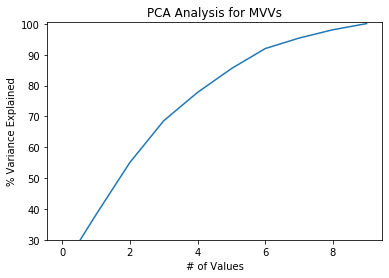

In [140]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Values')
plt.title('PCA Analysis for MVVs')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [137]:
X = MVV_freq

pca = PCA(n_components=10)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, title= "PCA Analysis for MVVs")
fig.show()

## All Values Frequencies

In [146]:
combined_freq= [[0.0117, 0.0104, 0.009, 0.0055, 0.009, 0.0104, 0.0255, 0.0304, 0.0007, 0.02],
           [0.0127, 0.019, 0.0127, 0.0063, 0.0063, 0.019, 0.0222, 0.0127, 0.0127, 0.0159],
           [0.0105, 0.0163, 0.0096, 0.0019, 0.0091, 0.0196, 0.0148, 0.0077, 0.0091, 0.0129],
           [0.0136, 0.0136, 0.0068, 0.0068, 0.0068, 0.0408, 0.0136, 0.034, 0.0136, 0.0544],
           [0.0118, 0.0324, 0.0088, 0.0, 0.0206, 0.0088, 0.0118, 0.0, 0.0, 0.0],
           [0.0078, 0.0294, 0.0039, 0.0, 0.0059, 0.0078, 0.0176, 0.0196, 0.0059, 0.0706],
           [0.0215, 0.0108, 0.043, 0.0, 0.0538, 0.0, 0.0323, 0.0054, 0.0, 0.0376],
           [0.014, 0.0321, 0.008, 0.0, 0.018, 0.002, 0.012, 0.014, 0.012, 0.0321],
           [0.0127, 0.019, 0.0127, 0.0063, 0.0063, 0.019, 0.0222, 0.0127, 0.0127, 0.0159],
           [0.0194, 0.0167, 0.0111, 0.0028, 0.0083, 0.025, 0.0139, 0.0194, 0.0056, 0.0194],
           
           [0.0096, 0.0208, 0.0192, 0.0016, 0.0208, 0.0112, 0.0352, 0.0384, 0.0128, 0.0208],
           [0.0061, 0.024, 0.0074, 0.0061, 0.008, 0.0221, 0.0215, 0.0049, 0.0086, 0.0086],
           [0.0108, 0.0431, 0.0043, 0.0022, 0.0086, 0.0065, 0.028, 0.0129, 0.0, 0.0216],
           [0.011, 0.0198, 0.0022, 0.0044, 0.0088, 0.0, 0.022, 0.0286, 0.0066, 0.0132],
           [0.0324, 0.037, 0.0139, 0.0, 0.0278, 0.0093, 0.0139, 0.0278, 0.0139, 0.0093],
           [0.0184, 0.0046, 0.0092, 0.0069, 0.0138, 0.0069, 0.0345, 0.0161, 0.0069, 0.0483],
           [0.0157, 0.0192, 0.0227, 0.0, 0.0087, 0.0192, 0.0175, 0.0157, 0.0105, 0.0279],
           [0.0, 0.024, 0.036, 0.004, 0.008, 0.02, 0.024, 0.016, 0.004, 0.02],
           [0.0087, 0.0192, 0.0192, 0.001, 0.0106, 0.0337, 0.0096, 0.0183, 0.0067, 0.0192],
           [0.0108, 0.0431, 0.0043, 0.0022, 0.0086, 0.0065, 0.028, 0.0129, 0.0, 0.0216],
           
           [0.0037, 0.0331, 0.0074, 0.0, 0.0074, 0.0331, 0.0479, 0.011, 0.0092, 0.0221],
           [0.0337, 0.0132, 0.0117, 0.0, 0.0146, 0.0102, 0.0381, 0.0395, 0.0, 0.0322],
           [0.0092, 0.0202, 0.0037, 0.0, 0.0221, 0.0202, 0.0202, 0.0349, 0.0037, 0.1011],
           [0.0174, 0.0326, 0.037, 0.0, 0.0217, 0.05, 0.0261, 0.0348, 0.0065, 0.0478],
           [0.005, 0.0348, 0.0087, 0.0012, 0.005, 0.0087, 0.0211, 0.0087, 0.0, 0.0124],
           [0.0179, 0.0313, 0.0112, 0.0022, 0.0134, 0.0045, 0.0515, 0.0224, 0.0022, 0.0403],
           [0.0202, 0.0101, 0.0076, 0.0025, 0.0076, 0.0354, 0.0278, 0.0429, 0.0, 0.0303],
           [0.0071, 0.0568, 0.0036, 0.0018, 0.0178, 0.0107, 0.0195, 0.0089, 0.0053, 0.0071],
           [0.0235, 0.0, 0.0118, 0.0235, 0.0118, 0.0, 0.0118, 0.0235, 0.0, 0.0],
           [0.0057, 0.0172, 0.0172, 0.0, 0.0144, 0.046, 0.0086, 0.0172, 0.0057,  0.0287],
                
                [0.0089, 0.0196, 0.0058, 0.0072, 0.0094, 0.0083, 0.0197, 0.0122, 0.0049, 0.0098],
 [0.0064, 0.0081, 0.0112, 0.0021, 0.0121, 0.0122, 0.0129, 0.0046, 0.0012, 0.0123],
 [0.0082, 0.0164, 0.0058, 0.0093, 0.0091, 0.01, 0.0173, 0.0176, 0.0007, 0.0189],
 [0.0109, 0.0191, 0.0108, 0.0047, 0.0065, 0.0101, 0.0261, 0.0093, 0.0018, 0.0147],
 [0.0081, 0.0182, 0.0062, 0.0077, 0.0094, 0.0222, 0.0214, 0.0168, 0.0023, 0.0218],
 [0.0072, 0.0234, 0.0066,  0.0085, 0.0073, 0.0165, 0.0213, 0.0059, 0.0015, 0.0088],
 [0.0086, 0.012, 0.0165, 0.0045, 0.0101, 0.017, 0.017, 0.0101, 0.0031, 0.0086],
 [0.0058, 0.0158, 0.0058, 0.0052, 0.0045, 0.0064, 0.0084, 0.0093, 0.0061, 0.0126],
 [0.0085, 0.0123, 0.0068, 0.0043, 0.0068, 0.0224, 0.0165, 0.0151, 0.0015, 0.0276],
 [0.0109, 0.0191, 0.0126, 0.0059, 0.0069, 0.0048, 0.0148, 0.0123, 0.0023, 0.0078],
 
 [0.0077, 0.0133, 0.0109, 0.002, 0.0138, 0.0247, 0.0158, 0.0137, 0.0041, 0.0123],
 [0.0113, 0.0302, 0.0052, 0.0128, 0.005, 0.0058, 0.0196, 0.0068, 0.0021, 0.0044],
 [0.0093, 0.0132, 0.0035, 0.0108, 0.0052, 0.0055, 0.0114, 0.0093, 0.002, 0.0076],
 [0.0091, 0.0254, 0.0067, 0.0081, 0.0059, 0.0092, 0.014, 0.0051, 0.0021, 0.0045],
 [0.0067, 0.0139, 0.0081, 0.0061, 0.0123, 0.0134, 0.0176, 0.0129, 0.0066, 0.0176],
 [0.0051, 0.0259, 0.0053, 0.0081, 0.0043, 0.0149, 0.0233, 0.016, 0.002, 0.02],
 [0.0071, 0.0151, 0.0027, 0.0093, 0.0044, 0.0046, 0.0138, 0.0096, 0.0186, 0.0062],
 [0.0116, 0.0147, 0.0078, 0.0067, 0.0077, 0.009, 0.0206, 0.0125, 0.0013, 0.0168],
 [0.0122, 0.0068, 0.0063, 0.0016, 0.0099, 0.0166, 0.0196, 0.0132, 0.0013, 0.0212],
 [0.0099, 0.0086, 0.0075, 0.0032, 0.012, 0.0156, 0.017, 0.0098, 0.0015, 0.0232],
 
 [0.0198, 0.0092, 0.0143, 0.0026, 0.016, 0.0155, 0.0241, 0.0287, 0.0015, 0.0354],
 [0.0104, 0.0174, 0.0066, 0.0047, 0.0117, 0.0154, 0.0167, 0.0126, 0.0054, 0.0142],
 [0.0063, 0.0224, 0.0067, 0.0097, 0.0048, 0.016, 0.0187, 0.0127, 0.0011, 0.0082],
 [0.0177, 0.0086, 0.0043, 0.001, 0.0163, 0.0115, 0.0235, 0.0297, 0.0004, 0.0198],
 [0.0081, 0.0076, 0.0115, 0.0024, 0.023, 0.0375, 0.0155, 0.015, 0.002, 0.0285],
 [0.0102, 0.0089, 0.0069, 0.0016, 0.0142, 0.0054, 0.0312, 0.0169, 0.001, 0.0186],
 [0.0062, 0.0137, 0.0096, 0.0041, 0.0118, 0.0264, 0.0199, 0.0118, 0.0016, 0.0181],
 [0.0118, 0.026, 0.0092, 0.0161, 0.0065, 0.0058, 0.012, 0.0052, 0.0048, 0.0008],
 [0.0102, 0.0247, 0.0058, 0.0082, 0.0081, 0.0087, 0.0186, 0.01, 0.0026, 0.0065],
 [0.0094, 0.0076, 0.0045, 0.0019, 0.0157, 0.0443, 0.0239, 0.0289, 0.0021, 0.0677]]
                


In [147]:
x=np.array(combined_freq)
x=scale(x);x

covar_matrix = PCA(n_components = 10) ##for 10 values

covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 27.9,  42.5,  56.2,  68.2,  78.5,  85.3,  90.8,  95.1,  97.9,
       100.1])

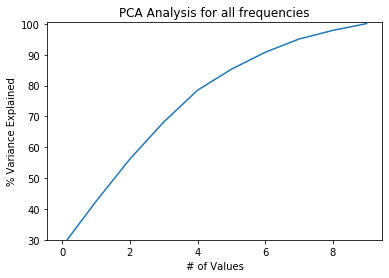

In [148]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Values')
plt.title('PCA Analysis for all frequencies')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [149]:
X = combined_freq

pca = PCA(n_components=10)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, title= "PCA Analysis for all frequencies")
fig.show()